Установка необходимых пакетов и импорт библиотек

In [1]:
!pip3 install anndata
!pip3 install matplotlib
!pip3 install pandas
!pip3 install seaborn
!pip3 install python-dateutil

In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap

In [13]:
21*192

4032

# Шаг 1 Загружаем файлы
Скачиваем отдельные файлы с каунтами из датасета - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103967

Нас интересуют файлы, соответсвующие клеткам "CD45- Epcam+ (4-6 weeks)
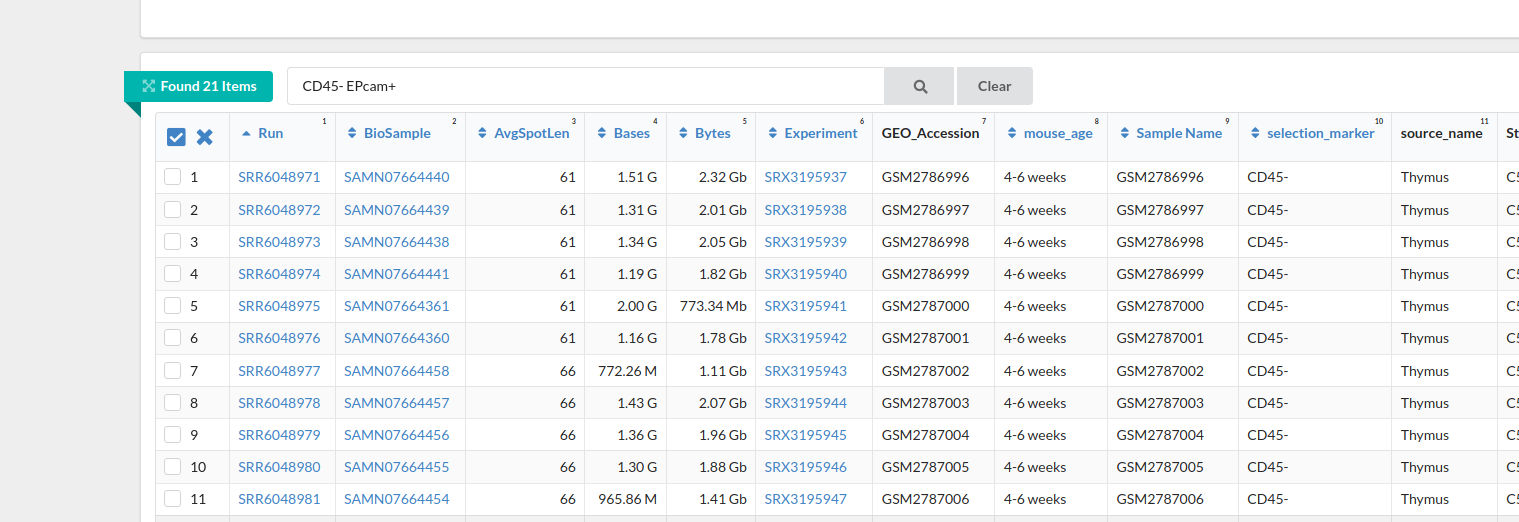

На деле колонок будет 21*192 = 4032

In [2]:
!ls

AB1395.txt  AB1539.txt	AB1545.txt  AB1649.txt	AB1795.txt
AB1396.txt  AB1540.txt	AB1546.txt  AB1751.txt	Copy_of_HW4_scRNA_seq.ipynb
AB1398.txt  AB1541.txt	AB1646.txt  AB1753.txt
AB1458.txt  AB1542.txt	AB1647.txt  AB1792.txt
AB1459.txt  AB1544.txt	AB1648.txt  AB1793.txt


In [6]:
# Download CD45- EpCAM+ cells
gsm_list = [
            ('7017', '1395'),
            ('7018', '1396'),
            ('7019', '1398'),
            ('7020', '1458'),
            ('7021', '1459'),
            ('7022', '1539'),
            ('7023', '1540'),
            ('7024', '1541'),
            ('7025', '1542'),
            ('7026', '1544'),
            ('7027', '1545'),
            ('7028', '1546'),
            ('7029', '1646'),
            ('7030', '1647'),
            ('7031', '1648'),
            ('7032', '1649'),
            ('7033', '1751'),
            ('7034', '1753'),
            ('7035', '1792'),
            ('7036', '1793'),
            ('7037', '1795'),
]

for gsm, ab in gsm_list:
    link = f" https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM278{gsm}'&'format=file'&'file=GSM278{gsm}%5FAB{ab}%2Etxt%2Egz"
    out_file = f"AB{ab}.txt.gz" 
    !wget -nv -O $out_file -c $link
    !gzip -f -d $out_file
    

2022-12-13 20:06:50 URL:https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM2787017&format=file&file=GSM2787017%5FAB1395%2Etxt%2Egz [484276/484276] -> "AB1395.txt.gz" [1]
2022-12-13 20:06:51 URL:https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM2787018&format=file&file=GSM2787018%5FAB1396%2Etxt%2Egz [398303/398303] -> "AB1396.txt.gz" [1]
2022-12-13 20:06:53 URL:https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM2787019&format=file&file=GSM2787019%5FAB1398%2Etxt%2Egz [490402/490402] -> "AB1398.txt.gz" [1]
2022-12-13 20:06:54 URL:https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM2787020&format=file&file=GSM2787020%5FAB1458%2Etxt%2Egz [393417/393417] -> "AB1458.txt.gz" [1]
2022-12-13 20:06:56 URL:https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM2787021&format=file&file=GSM2787021%5FAB1459%2Etxt%2Egz [482002/482002] -> "AB1459.txt.gz" [1]
2022-12-13 20:06:57 URL:https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM2787022&format=file&file=GSM2787022%5FAB1539%2Etxt%2Egz [348159/348159] -> "AB153

In [12]:
!ls

AB1395.txt  AB1539.txt	AB1545.txt  AB1649.txt	AB1795.txt
AB1396.txt  AB1540.txt	AB1546.txt  AB1751.txt	Copy_of_HW4_scRNA_seq.ipynb
AB1398.txt  AB1541.txt	AB1646.txt  AB1753.txt
AB1458.txt  AB1542.txt	AB1647.txt  AB1792.txt
AB1459.txt  AB1544.txt	AB1648.txt  AB1793.txt


# Шаг 2 Объединяем все файлы в один
В итоге получается 1 большая матрица размером 34016 rows × 8064 columns!

На деле колонок будет 21*192 = 4032 (см. шаг 1)

In [3]:
import glob

counts = pd.DataFrame()
files = [pd.read_csv(txt, sep="\t", header=0) for txt in glob.glob("./*.txt")]
counts = pd.concat(files, axis=1)
counts

,W291857,W291858,W291859,W291860,W291861,W291862,W291863,W291864,W291865,W291866,...,W340423,W340424,W340425,W340426,W340427,W340428,W340429,W340430,W340431,W340432
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,0,0
0610007L01Rik,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Шаг 3 Экспрессия маркерных генов

Сопоставляем ID-шники клеток (столцы в файлах из GEO) с ID-шниками от авторов (https://drive.google.com/file/d/1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G/view?usp=sharing) -- они должны совпадать. Дальше работаем только с клетками из файла авторов.




In [ ]:
#Файл скачан руками потому что ссылка на view

In [61]:
# choose only cells from the provided file
!head -n 5 thymus_epithel_clusts.txt
thymus = pd.read_csv("thymus_epithel_clusts.txt", sep="\t").rename(columns={"Unnamed: 0":"cell", "clust":"clust", "group":"group"})
thymus

### ADD YOUR CODE HERE

	clust	group
W160351	2	mTEC-IV
W160352	32	mTEC-III
W160353	35	mTEC-II
W160357	34	mTEC-II


,cell,clust,group
0,W160351,2,mTEC-IV
1,W160352,32,mTEC-III
2,W160353,35,mTEC-II
3,W160357,34,mTEC-II
4,W160358,3,mTEC-IV
...,...,...,...
2336,W271100,30,mTEC-II
2337,W271101,23,mTEC-III
2338,W271102,35,mTEC-II
2339,W271106,20,mTEC-I


In [64]:
inner = set(pd.unique(thymus.cell)).intersection(set(pd.unique(counts.columns)))
res = counts.loc[:, inner]
res

<ipython-input-64-c3f0a2b6f748>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  res = counts.loc[:, inner]


,W431535,W314751,W431867,W291666,W340872,W291721,W378681,W379191,W378895,W314876,...,W431588,W340037,W378862,W340415,W431505,W378528,W291905,W340962,W416195,W378695
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,0,0,1,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,1,0,0,0,...,2,0,0,1,0,1,0,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,2,0,0,0,...,0,0,0,2,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
markers = ['Ctsl', 'Psmb11', 'Prss16', 'Ascl1', 'Sox4', 'Ccl21a', 'Apoe', 'Ly6a', 'Ccl21c', 'Aire', 'Hdc', 'Ubd', \
           'Cd52', 'Ccl20', 'Serpinb6a', 'Ly6d', 'Pigr', 'Car8', 'Lcn2', 'Trpm5', 'Avil', 'Gnb3', 'Lrmp']

In [65]:
# normalization (TPM (transcripts per million), FPKM (fragments per kilobase of transcript per million fragments mapped),
# normalized counts using coefficient of variation, intraclass correlation coefficient).
for column in res:
    res[column] = (1_000_000/res[column].sum())*res[column]
res

,W431535,W314751,W431867,W291666,W340872,W291721,W378681,W379191,W378895,W314876,...,W431588,W340037,W378862,W340415,W431505,W378528,W291905,W340962,W416195,W378695
0610005C13Rik,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
0610007C21Rik,0.0,0.0,0.0,843.17032,0.0,314.415972,0.000000,134.643867,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
0610007L01Rik,0.0,0.0,0.0,0.00000,0.0,0.000000,426.985482,0.000000,0.0,0.0,...,768.935025,0.0,0.0,147.579693,0.0,155.593590,0.0,0.0,0.0,0.000000
0610007P08Rik,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,311.187179,0.0,0.0,0.0,0.000000
0610007P14Rik,0.0,0.0,0.0,0.00000,0.0,0.000000,853.970965,0.000000,0.0,0.0,...,0.000000,0.0,0.0,295.159386,0.0,155.593590,0.0,0.0,0.0,285.551114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
snoZ178,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
snoZ39,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
snoZ40,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


In [71]:
inner_plus = set(thymus.cell).intersection(set(pd.unique(counts.columns)))
res_plus = counts.loc[:, inner_plus]

marked = res_plus.loc[markers, :]


<ipython-input-71-cded8561e9d9>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  res_plus = counts.loc[:, inner_plus]


In [72]:
#sort_counts = counts_mark.copy()
marked.loc['group', :] = 0
groups = thymus.set_index('cell').T[inner_plus]

marked.loc['group', :] = groups.loc['group', :]
marked.sort_values(by=['group'], axis=1, inplace=True)

<ipython-input-72-d2ff4a442ff0>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  groups = thymus.set_index('cell').T[inner_plus]


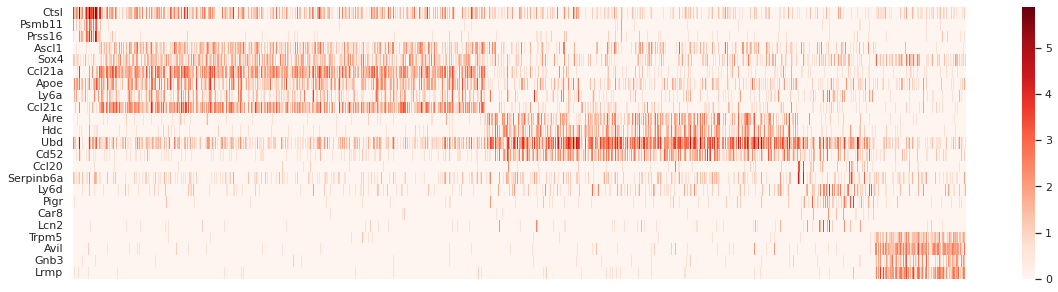

In [74]:

f, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(np.log(marked.drop(index=['group']).astype(float) + 1), yticklabels=True, xticklabels=False, cmap='Reds')
plt.show()

# Шаг 4 Визуализируем все 2341 клетки на UMAP и PCA

Для этого предлагается использовать пакеты anndata (https://anndata-tutorials.readthedocs.io/en/latest/getting-started.html) и scanpy (https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

In [75]:
# counts_norm - normalized data

adata = ad.AnnData(res.T)
sc.pp.log1p(adata)
# adata.var_names = list(counts_norm.index)
# adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]

<ipython-input-75-c13a47a9da77>:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(res.T)


In [76]:
# add to metadata cell type provided by authors
adata.obs["cell_type"] = groups.loc['group', :]
### ADD YOUR CODE HERE

In [ ]:
# cells_type_data - cell type provided by authors
adata.obs["cell_type"] = cells_type_data

In [77]:
sc.pp.pca(adata, n_comps=50)

In [84]:
colors = ['red', 'green', 'black', 'pink', 'orange']
cmap = get_cmap(ListedColormap(colors))
groups

cell,W431535,W314751,W431867,W291666,W340872,W291721,W378681,W379191,W378895,W314876,...,W431588,W340037,W378862,W340415,W431505,W378528,W291905,W340962,W416195,W378695
clust,29,22,1,8,15,5,12,34,18,8,...,2,13,26,28,6,26,30,30,25,34
group,mTEC-II,mTEC-III,mTEC-IV,mTEC-I,mTEC-I,cTEC,mTEC-I,mTEC-II,mTEC-I,mTEC-I,...,mTEC-IV,mTEC-I,mTEC-II,mTEC-II,mTEC-I,mTEC-II,mTEC-II,mTEC-II,mTEC-II,mTEC-II


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


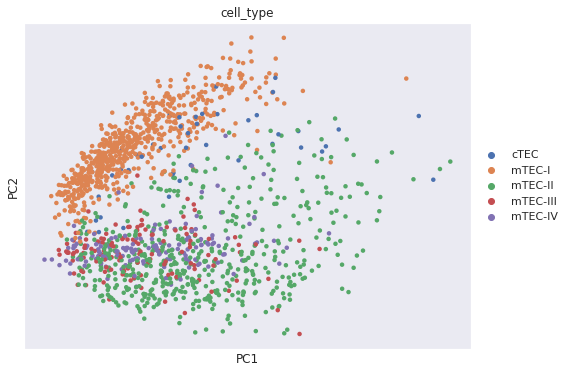

In [80]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.pca(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
#for i, c in enumerate(colors):
#  print(f'{groups[i]} - {c}') - уже сделано на графике, опущено (более того, переменную groups я оверрайднул)

In [85]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


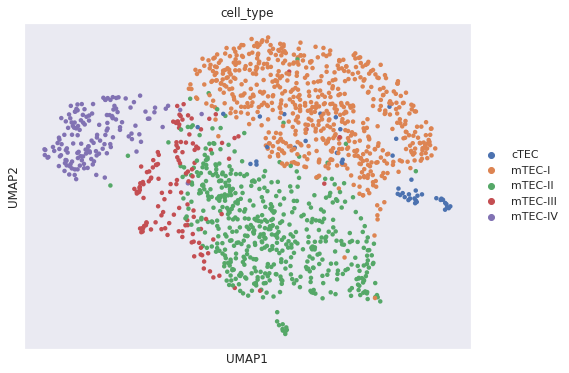

In [87]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.umap(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
plt.show()
#for i, c in enumerate(colors):
#  print(f'{groups[i]} - {c}') - уже сделано на графике, опущено (более того, переменную groups я оверрайднул)